In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt


df=pd.read_csv("employee churn data.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'employee churn data.csv'

In [128]:
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5,0.577607,1,179.821083,no


In [129]:
df.tail()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
9535,operations,0,0.610988,4,medium,8,0.543641,0,188.155738,yes
9536,logistics,0,0.746887,3,medium,8,0.549048,0,188.176164,yes
9537,operations,0,0.557980,3,low,7,0.705425,0,186.531008,yes
9538,IT,0,0.584446,4,medium,8,0.607287,1,187.641370,yes
9539,finance,0,0.626373,3,low,7,0.706455,1,185.920934,yes


In [130]:
df.describe()

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
count,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000
mean,0.030294,0.651826,3.274843,6.556184,0.504645,0.212055,184.661571
std,0.171403,0.085307,0.579136,1.415432,0.158555,0.408785,4.144831
min,0.000000,0.310000,2.000000,2.000000,0.000000,0.000000,171.374061
25%,0.000000,0.592884,3.000000,5.000000,0.386801,0.000000,181.472085
50%,0.000000,0.647456,3.000000,7.000000,0.500786,0.000000,184.628795
75%,0.000000,0.708379,4.000000,8.000000,0.622607,0.000000,187.728708
max,1.000000,1.000000,5.000000,12.000000,1.000000,1.000000,200.861656


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   int64  
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 745.4+ KB


In [132]:
df.columns.values

array(['department', 'promoted', 'review', 'projects', 'salary', 'tenure',
       'satisfaction', 'bonus', 'avg_hrs_month', 'left'], dtype=object)

In [133]:
df.isnull().sum()

department       0
promoted         0
review           0
projects         0
salary           0
tenure           0
satisfaction     0
bonus            0
avg_hrs_month    0
left             0
dtype: int64

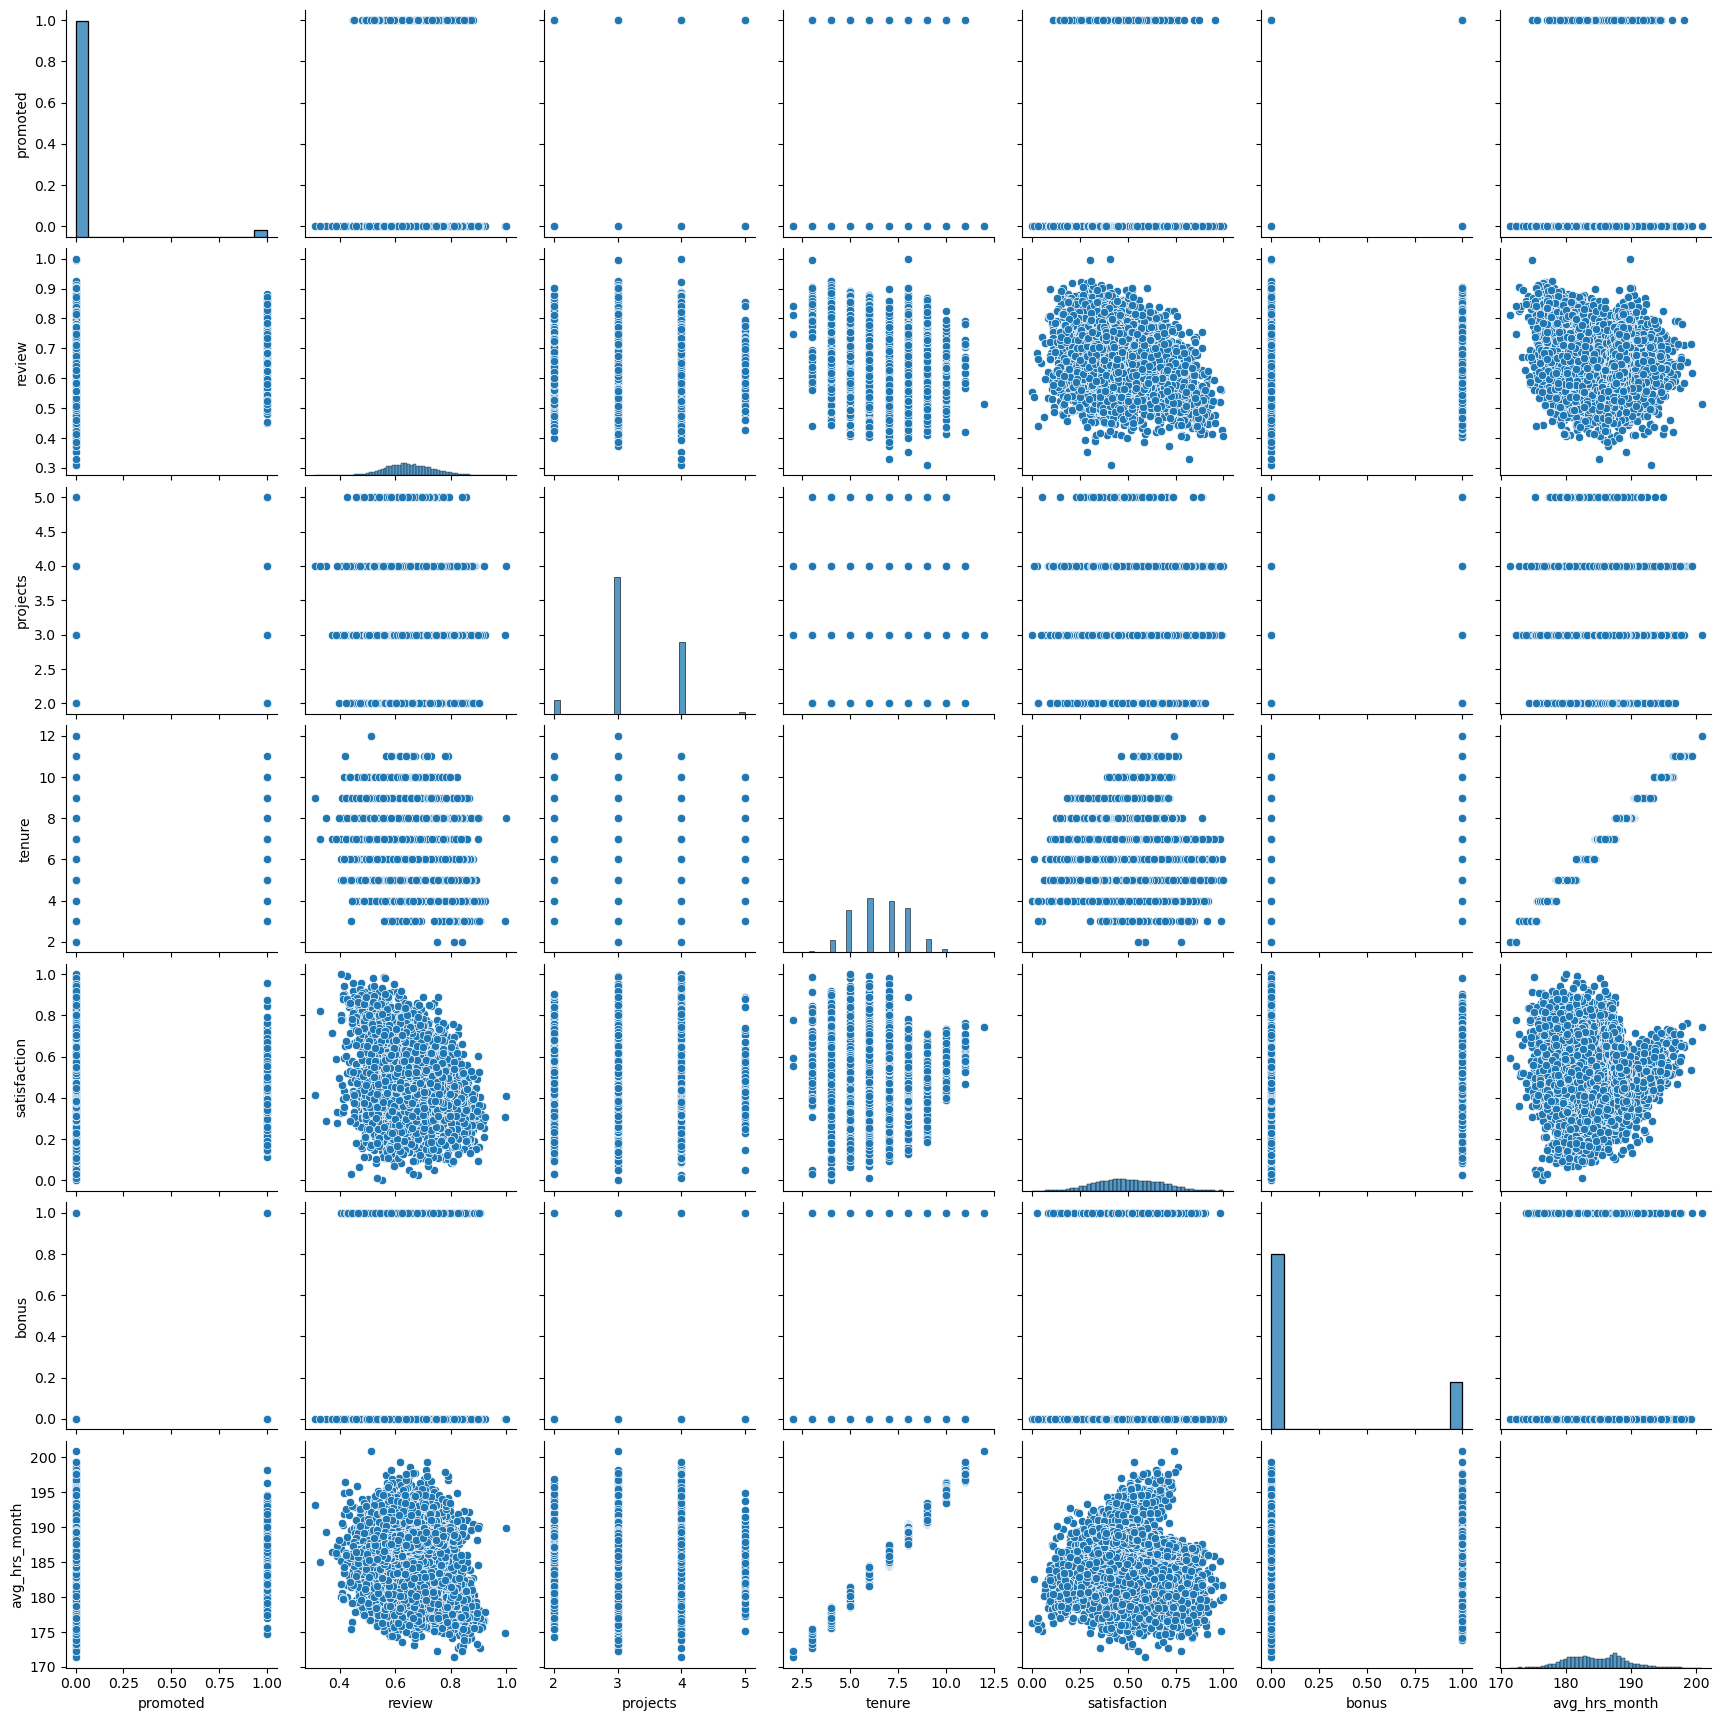

In [134]:
sns.pairplot(df)

In [136]:
salary_mapping = {
    'low': 0,
    'medium': 1,
    'high': 2
}

# Apply ordinal encoding to the 'salary' column
df['salary_encoded'] = df['salary'].map(salary_mapping)
print(df)



      department  promoted    review  projects  salary  tenure  satisfaction  \
0     operations         0  0.577569         3     low       5      0.626759   
1     operations         0  0.751900         3  medium       6      0.443679   
2        support         0  0.722548         3  medium       6      0.446823   
3      logistics         0  0.675158         4    high       8      0.440139   
4          sales         0  0.676203         3    high       5      0.577607   
...          ...       ...       ...       ...     ...     ...           ...   
9535  operations         0  0.610988         4  medium       8      0.543641   
9536   logistics         0  0.746887         3  medium       8      0.549048   
9537  operations         0  0.557980         3     low       7      0.705425   
9538          IT         0  0.584446         4  medium       8      0.607287   
9539     finance         0  0.626373         3     low       7      0.706455   

      bonus  avg_hrs_month left  salary

In [137]:
df = pd.get_dummies(df, columns=['department'], drop_first=True)

# Display the updated DataFrame
print(df)

      promoted    review  projects  salary  tenure  satisfaction  bonus  \
0            0  0.577569         3     low       5      0.626759      0   
1            0  0.751900         3  medium       6      0.443679      0   
2            0  0.722548         3  medium       6      0.446823      0   
3            0  0.675158         4    high       8      0.440139      0   
4            0  0.676203         3    high       5      0.577607      1   
...        ...       ...       ...     ...     ...           ...    ...   
9535         0  0.610988         4  medium       8      0.543641      0   
9536         0  0.746887         3  medium       8      0.549048      0   
9537         0  0.557980         3     low       7      0.705425      0   
9538         0  0.584446         4  medium       8      0.607287      1   
9539         0  0.626373         3     low       7      0.706455      1   

      avg_hrs_month left  salary_encoded  department_admin  \
0        180.866070   no             

In [140]:

left_mapping = {
    'no': 0,
    'yes': 1,
}

# Apply ordinal encoding to the 'left' column
df['left_encoded'] = df['left'].map(left_mapping)
print(df)


      promoted    review  projects  salary  tenure  satisfaction  bonus  \
0            0  0.577569         3     low       5      0.626759      0   
1            0  0.751900         3  medium       6      0.443679      0   
2            0  0.722548         3  medium       6      0.446823      0   
3            0  0.675158         4    high       8      0.440139      0   
4            0  0.676203         3    high       5      0.577607      1   
...        ...       ...       ...     ...     ...           ...    ...   
9535         0  0.610988         4  medium       8      0.543641      0   
9536         0  0.746887         3  medium       8      0.549048      0   
9537         0  0.557980         3     low       7      0.705425      0   
9538         0  0.584446         4  medium       8      0.607287      1   
9539         0  0.626373         3     low       7      0.706455      1   

      avg_hrs_month left  salary_encoded  department_admin  \
0        180.866070   no             

In [141]:
#To find correlation of left_encoded with different predictors
df.corrwith(df['left_encoded']).sort_values()

promoted                 -0.036777
projects                 -0.012408
bonus                    -0.011485
department_finance       -0.010689
satisfaction             -0.009721
department_sales         -0.007244
department_operations    -0.005136
department_admin         -0.004975
department_engineering   -0.003409
department_support       -0.002154
salary_encoded            0.000943
department_logistics      0.007192
department_marketing      0.007443
avg_hrs_month             0.009008
tenure                    0.010521
department_retail         0.013345
review                    0.304294
left_encoded              1.000000
dtype: float64

Text(0, 0.5, 'left')

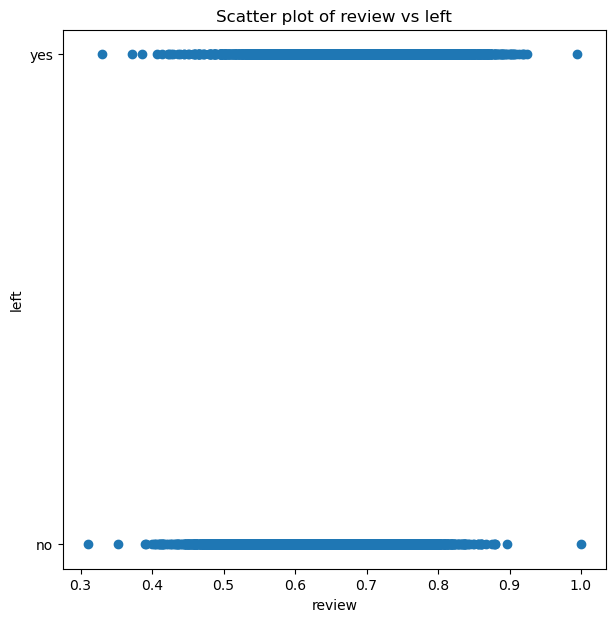

In [142]:
#Plotting a graph between left and review because left has the highest correlation with review
plt.figure(figsize=(7,7))
plt.scatter("review","left", data = df)
plt.title("Scatter plot of review vs left")
plt.xlabel("review")
plt.ylabel("left")

In [143]:
#Let's fit a Logistic Regression Model

In [144]:
np.random.seed(113)
features = df[["review"]]
target = df["left"]

In [145]:
from sklearn.model_selection import train_test_split
# Splitting into training and testing data
features_train, features_test, target_train,target_test = train_test_split(features,target, test_size = 0.25)

In [146]:
features_train.shape, features_test.shape

((7155, 1), (2385, 1))

In [147]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(features_train, target_train)

LogisticRegression()

In [148]:
print("Intercept:", model.intercept_,"\nCoefficients", model.coef_)

Intercept: [-6.020464] 
Coefficients [[7.77084009]]


In [149]:
train_accuracy = model.score(features_train, target_train)
test_accuracy = model.score(features_test, target_test)
print(train_accuracy, test_accuracy)

0.7433962264150943 0.7492662473794549


In [150]:
target_pred = model.predict(features_test)
target_pred[target_pred=="No"].shape

(0,)

In [151]:
from sklearn.metrics import confusion_matrix

In [152]:
test_conf_matrix = confusion_matrix(target_test,target_pred)
pd.DataFrame(test_conf_matrix ,columns = model.classes_,index = model.classes_)

,no,yes
no,1662,54
yes,544,125


In [153]:
test_correct_predictions = test_conf_matrix[0][0] + test_conf_matrix[1][1]
test_total_predictions  = test_conf_matrix.sum()
test_accuracy = test_correct_predictions / test_total_predictions
print(test_accuracy)

0.7492662473794549


In [ ]:
Accuracy=74.9%